<a href="https://colab.research.google.com/github/jackmaro/BHFinalProject/blob/main/BHFinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import math

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"128de4248c745e040927ee558a9bcd62"} #this is my (Jack) API key btw

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

r = get(baseUrl)
r.keys()
names = [sim['name'] for sim in r['simulations']]

#defining the "sim" function for TNG100-1
i = names.index('TNG300-1')
sim = get( r['simulations'][i]['url'])



In [22]:
#defining redshift values we are testing, etc
redshifts = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
sfrData = []
fractSubhalosUsed = 0.25

In [23]:
snaps = get(sim['url'] + 'snapshots/')

#Looping through all the snapshots to find the exact snapshots corresponding to the redshifts we're sampling
l=0
#redshifts with intervals of 0.5
snapz_00 = 0
snapz_05 = 0
snapz_10 = 0
snapz_15 = 0
snapz_20 = 0
snapz_25 = 0
snapz_30 = 0
snapz_35 = 0
snapz_40 = 0
snapz_45 = 0
snapz_50 = 0
snapz_55 = 0
snapz_60 = 0



#function for the ones in intervals of 0.5
while l < len(snaps):
  lval = float("{:.1f}".format(snaps[l]['redshift']))
  if lval == 0.0:
    snapz_00 = l
  elif lval == 0.5:
    snapz_05 = l
  elif lval == 1.0:
    snapz_10 = l
  elif lval == 1.5:
    snapz_15 = l
  elif lval == 2.0:
    snapz_20 = l
  elif lval == 3.0:
    snapz_30 = l
  elif lval == 3.5:
    snapz_35 = l
  elif lval == 4.0:
    snapz_40 = l
  elif lval == 5.0:
    snapz_50 = l
  elif lval == 5.5:
    snapz_55 = l
  elif lval == 6.0:
    snapz_60 = l
  l = l+1

snapz_25 = 29
snapz_45 = 19


#snapzlist = [snapz_00, snapz_05, snapz_10, snapz_15, snapz_20, snapz_25, snapz_30, snapz_35, snapz_40, snapz_45, snapz_50, snapz_55, snapz_60]

snapzlist = [snapz_00, snapz_05]

In [34]:
#parameters for the search
params = {'limit': 100*fractSubhalosUsed, 'order_by': '-mass_stars'}

#this returns a list of subhalos for a given redshift (input value), for bulk data retrieval
def subhalos(z):
  x = int(2*z)
  subhalos_url = snaps[snapzlist[x]]['url'] + 'subhalos/'
  return get(subhalos_url, params)

#function to pick a sample of subhalos using the above function, also for bulk data retrieval; fix
def pickSampledSubs(z):
  #subhalo_list = subhalos(z)['results']
  #sampledSubs = np.random.choice(subhalo_list, size=int(len(subhalo_list)*fractSubhalosUsed), replace=False)
  subhalo_list = subhalos(z)['results']
  sampledSubs = subhalo_list
  return sampledSubs

#function to fetch the ids of the queried subhalos
def grabid(z):
  subhalo_list = pickSampledSubs(z)
  subhaloids = [subhalo['id'] for subhalo in subhalo_list]
  return subhaloids

In [32]:
#function to find the subhalo arrays
def findSFR(y): #input an array of subhalos (ie from pick sampled subs)
  sfrs = []
  i=0
  for i in range(0,len(y)):
    samplesubsfr = y[i]['sfr']
    sfrs.append(samplesubsfr)
    i=i+1
  return sfrs

In [35]:
#actually getting data:

#sampling subhalos
samplesubs_z00 = pickSampledSubs(0)
samplesubs_z05 = pickSampledSubs(0.5)
'''
samplesubs_z10 = pickSampledSubs(1)
samplesubs_z15 = pickSampledSubs(1.5)
samplesubs_z20 = pickSampledSubs(2)
samplesubs_z25 = pickSampledSubs(2.5)
samplesubs_z30 = pickSampledSubs(3)
samplesubs_z35 = pickSampledSubs(3.5)
samplesubs_z40 = pickSampledSubs(4)
samplesubs_z45 = pickSampledSubs(4.5)
samplesubs_z50 = pickSampledSubs(5)
samplesubs_z55 = pickSampledSubs(5.5)
samplesubs_z60 = pickSampledSubs(6)
'''


#finding their sfr's
sfr_z00 = findSFR(samplesubs_z00)
sfr_z05 = findSFR(samplesubs_z05)


'''
sfr_z10 = findSFR(samplesubs_z10)
sfr_z15 = findSFR(samplesubs_z15)
sfr_z20 = findSFR(samplesubs_z20)
sfr_z25 = findSFR(samplesubs_z25)
sfr_z30 = findSFR(samplesubs_z30)
sfr_z35 = findSFR(samplesubs_z35)
sfr_z40 = findSFR(samplesubs_z40)
sfr_z45 = findSFR(samplesubs_z45)
sfr_z50 = findSFR(samplesubs_z50)
sfr_z55 = findSFR(samplesubs_z55)
sfr_z60 = findSFR(samplesubs_z60)
'''

#finding their id's as well
id_z00 = grabid(0)
id_z05 = grabid(0.5)


#filtering out 0 from each sfr
while 0 in sfr_z00:
    index = sfr_z00.index(0)
    sfr_z00.pop(index)
    id_z00.pop(index)
while 0 in sfr_z05:
    index = sfr_z05.index(0)
    sfr_z05.pop(index)
    id_z05.pop(index)



The index being removed is 0
The index being removed is 5
The index being removed is 6
The index being removed is 6
The index being removed is 7
The index being removed is 9
The index being removed is 9
The index being removed is 9
The index being removed is 12
The index being removed is 14
The index being removed is 14
The index being removed is 18
The index being removed is 20
The index being removed is 22
The index being removed is 22
The index being removed is 26
The index being removed is 26
The index being removed is 27
The index being removed is 29
The index being removed is 32
The index being removed is 35
The index being removed is 35
The index being removed is 35
The index being removed is 36
The index being removed is 37
The index being removed is 39
The index being removed is 42
The index being removed is 44
The index being removed is 50
The index being removed is 54
The index being removed is 56
The index being removed is 57
The index being removed is 57
The index being re

In [36]:
#avg sfr for each redshift
avg_sfr_z00 = sum(sfr_z00)/len(sfr_z00)
avg_sfr_z05 = sum(sfr_z05)/len(sfr_z05)
'''
avg_sfr_z10 = sum(sfr_z10)/len(sfr_z10)
avg_sfr_z15 = sum(sfr_z15)/len(sfr_z15)
avg_sfr_z20 = sum(sfr_z20)/len(sfr_z20)
avg_sfr_z25 = sum(sfr_z25)/len(sfr_z25)
avg_sfr_z30 = sum(sfr_z30)/len(sfr_z30)
avg_sfr_z35 = sum(sfr_z35)/len(sfr_z35)
avg_sfr_z40 = sum(sfr_z40)/len(sfr_z40)
avg_sfr_z45 = sum(sfr_z45)/len(sfr_z45)
avg_sfr_z50 = sum(sfr_z50)/len(sfr_z50)
avg_sfr_z55 = sum(sfr_z55)/len(sfr_z55)
avg_sfr_z60 = sum(sfr_z60)/len(sfr_z60)
'''

#initializing numpy array containing sfr's; ie sfrData
#sfrData = np.array([avg_sfr_z00,avg_sfr_z05,avg_sfr_z10,avg_sfr_z15,avg_sfr_z20,avg_sfr_z25, avg_sfr_z30, avg_sfr_z35, avg_sfr_z40, avg_sfr_z45, avg_sfr_z50, avg_sfr_z55, avg_sfr_z60])
#idNumbs = [id_z00, id_z05, id_z10, id_z15, id_z20, id_z25, id_z30, id_z35, id_z40, id_z45, id_z50, id_z55, id_z60]


sfrData = np.array([avg_sfr_z00,avg_sfr_z05])
idNumbs = [id_z00, id_z05]

ValueError: x and y must have same first dimension, but have shapes (13,) and (2,)

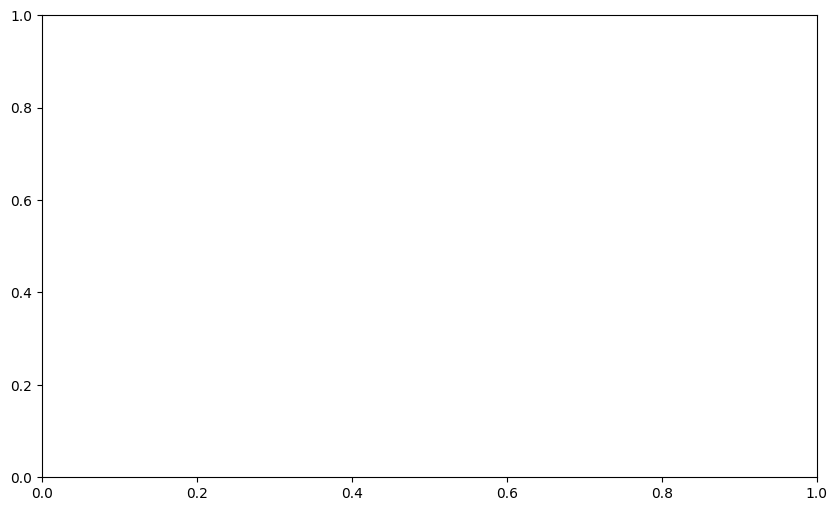

In [37]:
#plotting sfr vs redshift =)
plt.figure(figsize=(10, 6))
plt.plot(redshifts, sfrData, marker='o', linestyle='-', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Average Star Formation Rate')
plt.title('Average Star Formation Rate vs Redshift')
plt.grid(True)
plt.show()

In [ ]:
#start of the merger data !!! yayyy

def get_data(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


#

In [ ]:
#NOTE TO CICI/UZI: I want to make this into a function such that we vary snap number and subid because we have 12 different snap numbers and for each of those 12 we have (slightly less than) 100 subids to sort through
sim = 'TNG100-1'
snap_num = 50
subid = 31452

sub_url = "http://www.tng-project.org/api/%s/snapshots/%d/subhalos/%d/"%(sim, snap_num, subid)

# Here I'm querying the particle ID and masses of blackholes in this subhalo
cutout_request = {'bhs':'ParticleIDs,Masses'}
cutout = get_data(sub_url+"cutout.hdf5", cutout_request)

print(cutout)




In [ ]:
import h5py
with h5py.File(cutout,'r') as f:
    bhids = f['PartType5']['ParticleIDs'][:]
    bhmasses = f['PartType5']['Masses'][:] * 1e10/sim['hubble']

In [ ]:
print("IDs of all black holes in this subhalo:\n", bhids)
print("And their corresponding masses (in Msun):\n", bhmasses)
numbhs = len(bhids)
print(numbhs)

#fetching merger data from file
data_dir = "./"
tng100_mergers = np.load(data_dir + 'TNG100_mergers_withID.npy')